In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from pymongo.mongo_client import MongoClient
from pymongo.server_api import ServerApi

import os
from dotenv import load_dotenv # add this line

import json

from scipy import stats

In [3]:
# Python program to read
# json file
 
import json
 
# Opening JSON file
f = open("change_perception_experiment_results.json")
 
# returns JSON object as 
# a dictionary
data = json.load(f)

f.close()

In [4]:
exp_df = pd.DataFrame(list(data))
exp_df = pd.concat([exp_df.drop(['data'], axis=1), exp_df['data'].apply(pd.Series)], axis=1)
exp_df = pd.concat([exp_df.drop(['trials'], axis=1), exp_df['trials'].apply(pd.Series)], axis=1)

In [5]:
exp_df = exp_df[[3, 5, 6]]

exp_df = pd.concat([exp_df.drop([3], axis=1), exp_df[3].apply(pd.Series)], axis=1)
exp_df = pd.concat([exp_df.drop([6], axis=1), exp_df[6].apply(pd.Series)], axis=1)

In [6]:
exp_df = exp_df[[5, 'stimulus_type', 'response']]
exp_df = exp_df.rename(columns={"response": "response_survey"})
exp_df = exp_df.rename(columns={"stimulus_type": "stimulus_category"})


In [7]:
exp_df

,5,stimulus_category,response_survey
0,"{'rt': 10678, 'stimulus': '<div style='float: ...",temp,"{'Climate': 6, 'Attention': 9, 'Temperature': ..."
1,"{'rt': 2096, 'stimulus': '<div style='float: c...",temp,"{'Temperature': 0, 'Climate': 0, 'Freeze': 0, ..."
2,"{'rt': 1630, 'stimulus': '<div style='float: c...",temp,"{'Freeze': 6, 'Temperature': 6, 'Climate': 6, ..."
3,"{'rt': 17454, 'stimulus': '<div style='float: ...",temp,"{'Freeze': 2, 'Climate': 3, 'Temperature': 4, ..."
4,"{'rt': 9879, 'stimulus': '<div style='float: c...",temp,"{'Attention': 9, 'Freeze': 3, 'Climate': 7, 'T..."
...,...,...,...
794,"{'rt': 14856, 'stimulus': '<div style='float: ...",temp,"{'Temperature': 6, 'Freeze': 6, 'Attention': 9..."
795,"{'rt': 9405, 'stimulus': '<div style='float: c...",freeze,"{'Climate': 5, 'Freeze': 3, 'Temperature': 2, ..."
796,"{'rt': 66441, 'stimulus': '<div style='float: ...",freeze,"{'Freeze': 8, 'Temperature': 8, 'Climate': 8, ..."
797,"{'rt': 10716, 'stimulus': '<div style='float: ...",temp,"{'Climate': 8, 'Freeze': 9, 'Temperature': 9, ..."


In [7]:
exp_df = pd.concat([exp_df.drop([5], axis=1), exp_df[5].apply(pd.Series)], axis=1)
exp_df = exp_df.rename(columns={"rt": "response_time"})
exp_df = exp_df[["response_time", 'stimulus_category', 'stimulus_type', 'response_survey']]
exp_df = exp_df.rename(columns={"stimulus_type": "lake"})

exp_df = pd.concat([exp_df.drop(['response_survey'], axis=1), exp_df['response_survey'].apply(pd.Series)], axis=1)

# keep only entries where subject was paying attention
exp_df = exp_df[exp_df['Attention'] == 9]
exp_df = exp_df[exp_df['response_time'] >= 2000]

# add 1 to numerical entries to shift to 1-10 scale
exp_df = pd.concat([exp_df.drop(['stimulus_category', 'lake'], axis=1)+1, exp_df[['stimulus_category','lake']]], axis=1)

In [8]:
exp_df

,response_time,Climate,Attention,Temperature,Freeze,0,stimulus_category,lake
0,10679.0,7.0,10.0,8.0,4.0,NaN,temp,../img/plots/continuous_0.479774992677482_.png
1,2097.0,1.0,10.0,1.0,1.0,NaN,temp,../img/plots/continuous_0.63940802173239_.png
3,17455.0,4.0,10.0,5.0,3.0,NaN,temp,../img/plots/continuous_0.425065517952992_.png
4,9880.0,8.0,10.0,8.0,4.0,NaN,temp,../img/plots/continuous_0.425065517952992_.png
5,28985.0,8.0,10.0,8.0,8.0,NaN,temp,../img/plots/continuous_0.63940802173239_.png
...,...,...,...,...,...,...,...,...
790,185517.0,5.0,10.0,7.0,6.0,NaN,temp,../img/plots/continuous_0.556919429826064_.png
794,14857.0,8.0,10.0,7.0,7.0,NaN,temp,../img/plots/continuous_0.332744361481887_.png
795,9406.0,6.0,10.0,3.0,4.0,NaN,freeze,../img/plots/binary_0.154558810800488_.png
796,66442.0,9.0,10.0,9.0,9.0,NaN,freeze,../img/plots/binary_0.389984422823742_.png


In [9]:
exp_df.dropna(axis = 1, inplace = True, how = 'all')
exp_df.dropna(axis = 0, inplace = True, how = 'all')

In [10]:
exp_df['lake'] = exp_df['lake'].str.replace("../img/plots/", "") 
exp_df['lake'] = exp_df['lake'].str.replace("_freeze.png", "") 
exp_df['lake'] = exp_df['lake'].str.replace("_temp.png", "") 

In [11]:
exp_df['correlation'] = exp_df['lake'].str.extract('(\d+\.\d+)', expand=False).astype(float)

In [12]:
exp_freeze_df = exp_df[exp_df['stimulus_category'] == 'freeze']
exp_temp_df = exp_df[exp_df['stimulus_category'] == 'temp']

In [13]:
len(exp_freeze_df)

387

In [14]:
len(exp_temp_df)

379

In [15]:
exp_df = pd.concat([exp_freeze_df, exp_temp_df], axis = 0)

In [16]:
exp_df

,response_time,Climate,Attention,Temperature,Freeze,stimulus_category,lake,correlation
6,12453.0,2.0,10.0,2.0,1.0,freeze,binary_0.147948235627417_.png,0.147948
9,11819.0,8.0,10.0,7.0,7.0,freeze,binary_0.634839480557545_.png,0.634839
12,7303.0,8.0,10.0,8.0,9.0,freeze,binary_0.542787755876701_.png,0.542788
15,19440.0,9.0,10.0,8.0,8.0,freeze,binary_0.240944269450365_.png,0.240944
17,10076.0,10.0,10.0,10.0,10.0,freeze,binary_0.576004537224472_.png,0.576005
...,...,...,...,...,...,...,...,...
788,23906.0,9.0,10.0,8.0,8.0,temp,continuous_0.332744361481887_.png,0.332744
789,73450.0,8.0,10.0,5.0,6.0,temp,continuous_0.228262992110872_.png,0.228263
790,185517.0,5.0,10.0,7.0,6.0,temp,continuous_0.556919429826064_.png,0.556919
794,14857.0,8.0,10.0,7.0,7.0,temp,continuous_0.332744361481887_.png,0.332744


# Analysis by Lake

In [47]:
exp_freeze_grouped_df = exp_freeze_df.groupby('lake')
exp_temp_grouped_df = exp_temp_df.groupby('lake')

In [48]:
exp_temp_grouped_df['Climate'].describe()

,count,mean,std,min,25%,50%,75%,max
lake,,,,,,,,
continuous_0.124623167861663_.png,21.0,5.095238,2.188716,1.0,4.00,5.0,7.00,9.0
continuous_0.147948235627417_.png,22.0,4.909091,2.486326,1.0,3.00,5.0,6.75,10.0
continuous_0.154558810800488_.png,23.0,5.565217,2.232530,1.0,4.50,6.0,7.00,10.0
continuous_0.201843664320262_.png,19.0,5.894737,1.791794,3.0,4.00,6.0,7.00,9.0
continuous_0.228262992110872_.png,19.0,5.842105,1.922474,2.0,4.50,6.0,7.00,10.0
continuous_0.240944269450365_.png,22.0,5.818182,1.562549,3.0,4.25,6.0,7.00,8.0
continuous_0.332744361481887_.png,24.0,6.250000,2.816875,1.0,4.00,7.0,8.00,10.0
continuous_0.365376012418508_.png,23.0,6.695652,1.579263,4.0,5.50,7.0,7.50,10.0
continuous_0.389984422823742_.png,13.0,7.230769,1.964427,3.0,6.00,7.0,9.00,10.0


In [49]:
exp_freeze_grouped_df['Climate'].describe()

,count,mean,std,min,25%,50%,75%,max
lake,,,,,,,,
binary_0.124623167861663_.png,35.0,6.142857,2.486941,1.0,4.50,7.0,8.00,10.0
binary_0.147948235627417_.png,22.0,5.545455,2.955661,1.0,3.00,6.0,8.00,10.0
binary_0.154558810800488_.png,21.0,5.571429,2.420153,1.0,3.00,6.0,7.00,9.0
binary_0.201843664320262_.png,28.0,6.821429,2.435137,2.0,5.00,7.0,9.00,10.0
binary_0.228262992110872_.png,19.0,6.894737,1.728671,3.0,6.00,7.0,8.00,10.0
binary_0.240944269450365_.png,20.0,7.600000,1.465390,3.0,7.00,8.0,8.25,10.0
binary_0.332744361481887_.png,20.0,7.800000,2.330575,3.0,7.00,8.0,10.00,10.0
binary_0.365376012418508_.png,18.0,8.444444,1.916560,3.0,8.00,9.0,10.00,10.0
binary_0.389984422823742_.png,17.0,7.823529,2.186187,2.0,8.00,8.0,9.00,10.0


# Analysis by correlation

In [50]:
low_cor_df = exp_df.loc[exp_df['correlation'] < 0.3]
mid_cor_df = exp_df.loc[(exp_df['correlation'] >= 0.3) & (exp_df['correlation'] < 0.5)]
high_cor_df = exp_df.loc[(exp_df['correlation'] >= 0.5) & (exp_df['correlation'] < 0.7)]

In [51]:
print(low_cor_df[low_cor_df['stimulus_category'] == 'freeze']['Climate'].mean())
print(low_cor_df[low_cor_df['stimulus_category'] == 'temp']['Climate'].mean())
print(stats.ttest_ind(low_cor_df[low_cor_df['stimulus_category'] == 'freeze']['Climate'], low_cor_df[low_cor_df['stimulus_category'] == 'temp']['Climate']))
print(mid_cor_df[mid_cor_df['stimulus_category'] == 'freeze']['Climate'].mean())
print(mid_cor_df[mid_cor_df['stimulus_category'] == 'temp']['Climate'].mean())
print(stats.ttest_ind(mid_cor_df[mid_cor_df['stimulus_category'] == 'freeze']['Climate'], mid_cor_df[mid_cor_df['stimulus_category'] == 'temp']['Climate']))
print(high_cor_df[high_cor_df['stimulus_category'] == 'freeze']['Climate'].mean())
print(high_cor_df[high_cor_df['stimulus_category'] == 'temp']['Climate'].mean())
print(stats.ttest_ind(high_cor_df[high_cor_df['stimulus_category'] == 'freeze']['Climate'], high_cor_df[high_cor_df['stimulus_category'] == 'temp']['Climate']))

6.4
5.507936507936508
TtestResult(statistic=3.250010481037662, pvalue=0.0013008714746621623, df=269.0)
8.141592920353983
6.871212121212121
TtestResult(statistic=4.808677858888487, pvalue=2.6656821375364404e-06, df=243.0)
8.178294573643411
7.462809917355372
TtestResult(statistic=2.9595369175161745, pvalue=0.003379309363026411, df=248.0)


In [58]:
print(exp_df[exp_df['stimulus_category'] == 'freeze']['Climate'].mean())
print(exp_df[exp_df['stimulus_category'] == 'temp']['Climate'].mean())
print(exp_df[exp_df['stimulus_category'] == 'freeze']['Climate'].std())
print(exp_df[exp_df['stimulus_category'] == 'temp']['Climate'].std())
print(exp_df[exp_df['stimulus_category'] == 'freeze']['Climate'].mean() - exp_df[exp_df['stimulus_category'] == 'temp']['Climate'].mean())
stats.ttest_ind(exp_df[exp_df['stimulus_category'] == 'freeze']['Climate'], exp_df[exp_df['stimulus_category'] == 'temp']['Climate'])

7.501291989664082
6.6068601583113455
2.2549596195993784
2.2256454765462728
0.8944318313527369


TtestResult(statistic=5.524108918254874, pvalue=4.543051890953186e-08, df=764.0)

In [19]:
print(exp_df[exp_df['stimulus_category'] == 'freeze']['Temperature'].mean() - exp_df[exp_df['stimulus_category'] == 'temp']['Temperature'].mean())
stats.ttest_ind(exp_df[exp_df['stimulus_category'] == 'freeze']['Temperature'], exp_df[exp_df['stimulus_category'] == 'temp']['Temperature'])

0.702726473175022


TtestResult(statistic=4.480700542344757, pvalue=8.578133702756232e-06, df=764.0)

In [20]:
print(exp_df[exp_df['stimulus_category'] == 'freeze']['Freeze'].mean() - exp_df[exp_df['stimulus_category'] == 'temp']['Freeze'].mean())
stats.ttest_ind(exp_df[exp_df['stimulus_category'] == 'freeze']['Freeze'], exp_df[exp_df['stimulus_category'] == 'temp']['Freeze'])

1.1060590565407402


TtestResult(statistic=6.8565487411103, pvalue=1.4557176245562793e-11, df=764.0)

Text(0.5, 1.0, 'Perceived Change in Climate')

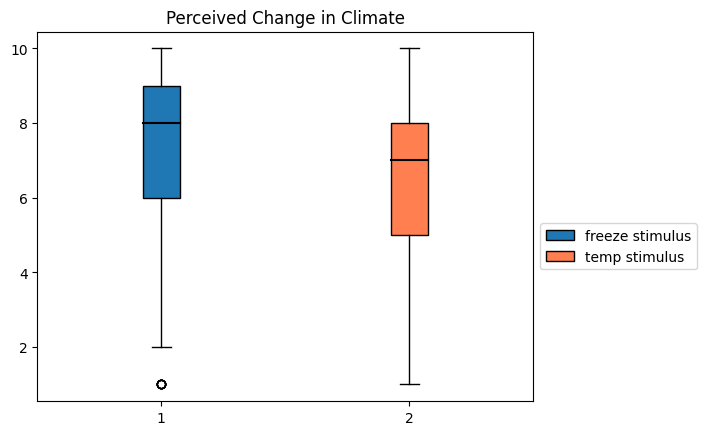

In [53]:
bp1 = plt.boxplot(exp_freeze_df['Climate'], positions=[1], patch_artist=True, boxprops=dict(facecolor="tab:blue"), medianprops = dict(color = "black", linewidth = 1.5))
bp2 = plt.boxplot(exp_temp_df['Climate'], positions=[2], patch_artist=True, boxprops=dict(facecolor="coral"), medianprops = dict(color = "black", linewidth = 1.5))
plt.legend([bp1["boxes"][0], bp2["boxes"][0]], ['freeze stimulus', 'temp stimulus'],  bbox_to_anchor=(1, 0.5))
plt.title('Perceived Change in Climate')

C:\Users\grace\AppData\Local\Temp\ipykernel_25248\1334726928.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


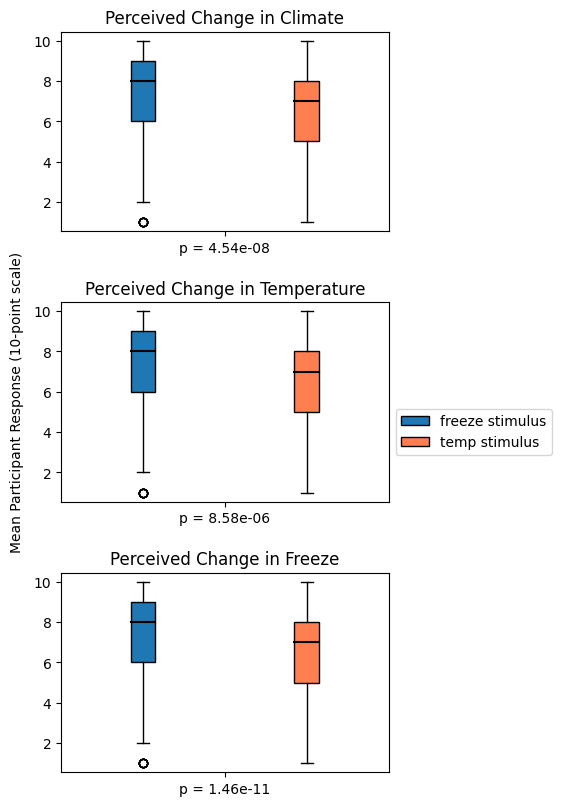

In [54]:
question_categories = ['Climate', 'Temperature', 'Freeze']
fig, axs = plt.subplots(3, figsize = (4, 8))
fig.tight_layout(h_pad = 3)
i = 0

fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)

for cat in question_categories:
    mean_diff_freeze = exp_freeze_df[cat].mean()
    stderr_freeze = exp_freeze_df[cat].sem()
    mean_diff_temp = exp_temp_df[cat].mean()
    stderr_temp = exp_temp_df[cat].sem()
    p_value = stats.ttest_ind(exp_freeze_df[cat], exp_temp_df[cat])[1]
    
    bp1 = axs[i].boxplot(exp_freeze_df['Climate'], positions=[1], patch_artist=True, boxprops=dict(facecolor="tab:blue"), medianprops = dict(color = "black", linewidth = 1.5))
    bp2 = axs[i].boxplot(exp_temp_df['Climate'], positions=[2], patch_artist=True, boxprops=dict(facecolor="coral"), medianprops = dict(color = "black", linewidth = 1.5))
    axs[i].set_title('Perceived Change in ' + cat)
    axs[i].set_xticks((np.arange(1)+1.5), (('p = ' + '{:0.2e}'.format(p_value)),))
    
    i += 1
    
axs[1].legend([bp1["boxes"][0], bp2["boxes"][0]], ['freeze stimulus', 'temp stimulus'],  bbox_to_anchor=(1, 0.5))
plt.ylabel('Mean Participant Response (10-point scale)')

fig.show()

C:\Users\grace\AppData\Local\Temp\ipykernel_25248\884251047.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


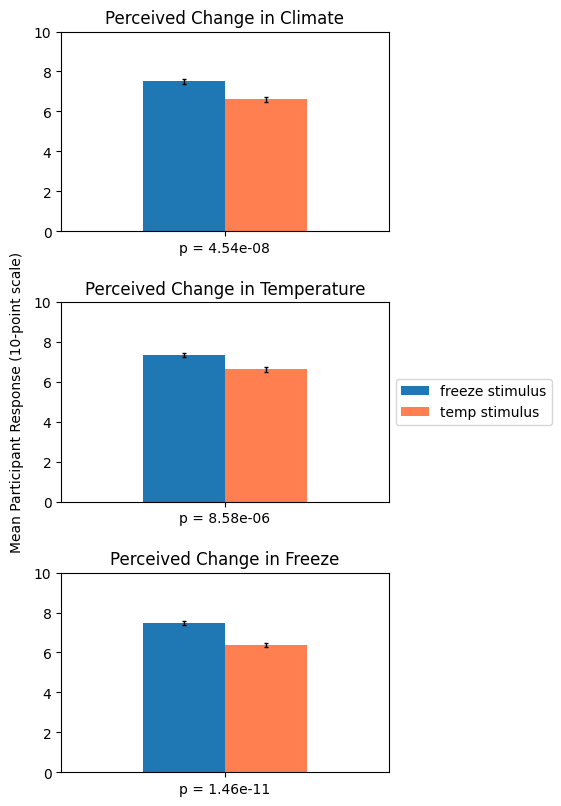

In [55]:
question_categories = ['Climate', 'Temperature', 'Freeze']
fig, axs = plt.subplots(3, figsize = (4, 8))
fig.tight_layout(h_pad = 3)
i = 0

fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)

for cat in question_categories:
    mean_diff_freeze = exp_freeze_df[cat].mean()
    stderr_freeze = exp_freeze_df[cat].sem()
    mean_diff_temp = exp_temp_df[cat].mean()
    stderr_temp = exp_temp_df[cat].sem()
    p_value = stats.ttest_ind(exp_freeze_df[cat], exp_temp_df[cat])[1]
    width = .25
    axs[i].bar(.375, mean_diff_freeze, width, color = "tab:blue", label = "freeze stimulus")
    axs[i].errorbar(0.375, mean_diff_freeze, yerr = stderr_freeze, fmt="none", color = 'black', elinewidth = 1, capsize = 1.5)
    axs[i].bar(.625, mean_diff_temp, width, color = "coral", label = "temp stimulus")
    axs[i].errorbar(.625, mean_diff_temp, yerr = stderr_temp, fmt="none", color = 'black', elinewidth = 1, capsize = 1.5)
    axs[i].set_title('Perceived Change in ' + cat)
    axs[i].set_xticks((np.arange(1)+0.5), (('p = ' + '{:0.2e}'.format(p_value)),))
    axs[i].set_ylim(0,10)
    axs[i].set_xlim(0,1)
    i += 1
    
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Mean Participant Response (10-point scale)')

fig.show()

C:\Users\grace\AppData\Local\Temp\ipykernel_25248\1388493014.py:67: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


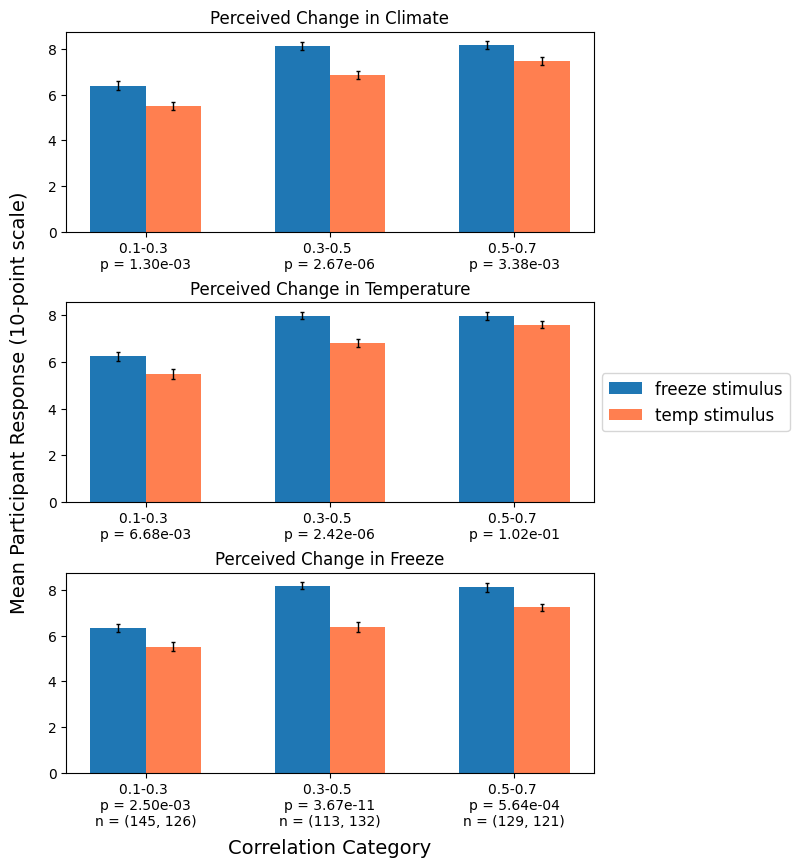

In [56]:
question_categories = ['Climate', 'Temperature', 'Freeze']
fig, axs = plt.subplots(3, figsize = (6, 8))
fig.tight_layout(h_pad = 3)
i = 0

fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)

for cat in question_categories:
    
    mean_diff_freeze_list = []
    mean_diff_temp_list = []
    p_value_list = []
    freeze_sample_size_list = []
    temp_sample_size_list = []
    stderr_freeze_list = []
    stderr_temp_list = []

    mean_diff_freeze_list.append(low_cor_df[low_cor_df['stimulus_category'] == 'freeze'][cat].mean())
    mean_diff_temp_list.append(low_cor_df[low_cor_df['stimulus_category'] == 'temp'][cat].mean())
    stderr_freeze_list.append(low_cor_df[low_cor_df['stimulus_category'] == 'freeze'][cat].sem())
    stderr_temp_list.append(low_cor_df[low_cor_df['stimulus_category'] == 'temp'][cat].sem())
    p_value_list.append(stats.ttest_ind(low_cor_df[low_cor_df['stimulus_category'] == 'freeze'][cat], low_cor_df[low_cor_df['stimulus_category'] == 'temp'][cat])[1])
    temp_sample_size_list.append(len(low_cor_df[low_cor_df['stimulus_category'] == 'temp'][cat]))
    freeze_sample_size_list.append(len(low_cor_df[low_cor_df['stimulus_category'] == 'freeze'][cat]))
    
    mean_diff_freeze_list.append(mid_cor_df[mid_cor_df['stimulus_category'] == 'freeze'][cat].mean())
    mean_diff_temp_list.append(mid_cor_df[mid_cor_df['stimulus_category'] == 'temp'][cat].mean())
    stderr_freeze_list.append(mid_cor_df[mid_cor_df['stimulus_category'] == 'freeze'][cat].sem())
    stderr_temp_list.append(mid_cor_df[mid_cor_df['stimulus_category'] == 'temp'][cat].sem())
    p_value_list.append(stats.ttest_ind(mid_cor_df[mid_cor_df['stimulus_category'] == 'freeze'][cat], mid_cor_df[mid_cor_df['stimulus_category'] == 'temp'][cat])[1])
    temp_sample_size_list.append(len(mid_cor_df[mid_cor_df['stimulus_category'] == 'temp'][cat]))
    freeze_sample_size_list.append(len(mid_cor_df[mid_cor_df['stimulus_category'] == 'freeze'][cat]))
    
    mean_diff_freeze_list.append(high_cor_df[high_cor_df['stimulus_category'] == 'freeze'][cat].mean())
    mean_diff_temp_list.append(high_cor_df[high_cor_df['stimulus_category'] == 'temp'][cat].mean())
    stderr_freeze_list.append(high_cor_df[high_cor_df['stimulus_category'] == 'freeze'][cat].sem())
    stderr_temp_list.append(high_cor_df[high_cor_df['stimulus_category'] == 'temp'][cat].sem())
    p_value_list.append(stats.ttest_ind(high_cor_df[high_cor_df['stimulus_category'] == 'freeze'][cat], high_cor_df[high_cor_df['stimulus_category'] == 'temp'][cat])[1])
    temp_sample_size_list.append(len(high_cor_df[high_cor_df['stimulus_category'] == 'temp'][cat]))
    freeze_sample_size_list.append(len(high_cor_df[high_cor_df['stimulus_category'] == 'freeze'][cat]))

    N = 3
    ind = np.arange(N)

    # Width of a bar 
    width = 0.3 

    axs[i].bar(ind, mean_diff_freeze_list, width, color = "tab:blue", label = "freeze stimulus")
    axs[i].errorbar(ind, mean_diff_freeze_list, yerr = stderr_freeze_list, fmt="none", color = 'black', elinewidth = 1, capsize = 1.5)
    axs[i].bar(ind + width, mean_diff_temp_list, width, color = "coral", label = "temp stimulus")
    axs[i].errorbar(ind+width, mean_diff_temp_list, yerr = stderr_temp_list, fmt="none", color = 'black', elinewidth = 1, capsize = 1.5)
    axs[i].set_title('Perceived Change in ' + cat, fontsize=12)
    axs[i].set_xticks(ind + width / 2, (('0.1-0.3 \np = ' + '{:0.2e}'.format(p_value_list[0])), 
                                        ('0.3-0.5 \np = ' + '{:0.2e}'.format(p_value_list[1])), 
                                        ('0.5-0.7 \np = ' + '{:0.2e}'.format(p_value_list[2]))))
    i += 1
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
axs[2].set_xticks(ind + width / 2, (('0.1-0.3 \np = ' + '{:0.2e}'.format(p_value_list[0]) + '\nn = (' + str(freeze_sample_size_list[0]) + ", " + str(temp_sample_size_list[0]) + ')'), 
                                        ('0.3-0.5 \np = ' + '{:0.2e}'.format(p_value_list[1]) + '\nn = (' + str(freeze_sample_size_list[1]) + ", " + str(temp_sample_size_list[1]) + ')'), 
                                        ('0.5-0.7 \np = ' + '{:0.2e}'.format(p_value_list[2]) + '\nn = (' + str(freeze_sample_size_list[2]) + ", " + str(temp_sample_size_list[2]) + ')')))
plt.ylabel('Mean Participant Response (10-point scale)', fontsize=14)
plt.xlabel('Correlation Category', labelpad=30, fontsize=14)

fig.show()

C:\Users\grace\AppData\Local\Temp\ipykernel_25248\1067492298.py:47: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


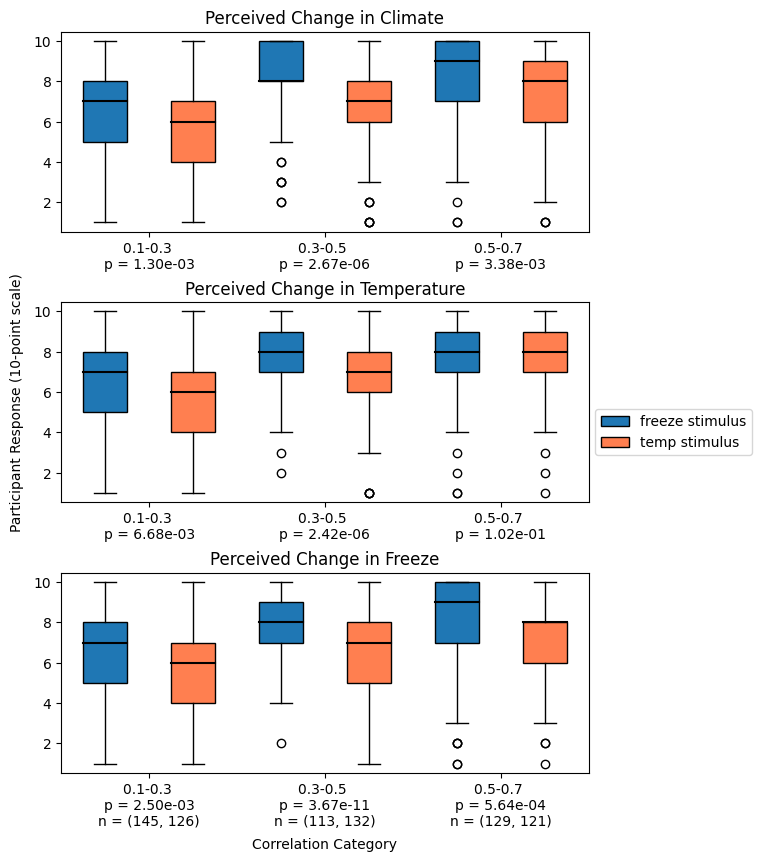

In [57]:
question_categories = ['Climate', 'Temperature', 'Freeze']
fig, axs = plt.subplots(3, figsize = (6, 8))
fig.tight_layout(h_pad = 3)
i = 0

fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)

for cat in question_categories:
    
    freeze_list = []
    temp_list = []
    p_value_list = []

    freeze_list.append(low_cor_df[low_cor_df['stimulus_category'] == 'freeze'][cat])
    temp_list.append(low_cor_df[low_cor_df['stimulus_category'] == 'temp'][cat])
    p_value_list.append(stats.ttest_ind(low_cor_df[low_cor_df['stimulus_category'] == 'freeze'][cat], low_cor_df[low_cor_df['stimulus_category'] == 'temp'][cat])[1])
    freeze_list.append(mid_cor_df[mid_cor_df['stimulus_category'] == 'freeze'][cat])
    temp_list.append(mid_cor_df[mid_cor_df['stimulus_category'] == 'temp'][cat])
    p_value_list.append(stats.ttest_ind(mid_cor_df[mid_cor_df['stimulus_category'] == 'freeze'][cat], mid_cor_df[mid_cor_df['stimulus_category'] == 'temp'][cat])[1])
    freeze_list.append(high_cor_df[high_cor_df['stimulus_category'] == 'freeze'][cat])
    temp_list.append(high_cor_df[high_cor_df['stimulus_category'] == 'temp'][cat])
    p_value_list.append(stats.ttest_ind(high_cor_df[high_cor_df['stimulus_category'] == 'freeze'][cat], high_cor_df[high_cor_df['stimulus_category'] == 'temp'][cat])[1])
    
    N = 3
    ind = np.arange(N)

    # Width of a bar 
    width = 0.3 
    
    bp1 = axs[i].boxplot(freeze_list, positions=[1, 3, 5], patch_artist=True, boxprops=dict(facecolor="tab:blue"), medianprops = dict(color = "black", linewidth = 1.5))
    bp2 = axs[i].boxplot(temp_list, positions=[2, 4, 6], patch_artist=True, boxprops=dict(facecolor="coral"), medianprops = dict(color = "black", linewidth = 1.5))
    axs[i].set_title('Perceived Change in ' + cat)
    axs[i].set_xticks([1.5, 3.5, 5.5], (('0.1-0.3 \np = ' + '{:0.2e}'.format(p_value_list[0])),
                                        ('0.3-0.5 \np = ' + '{:0.2e}'.format(p_value_list[1])),
                                        ('0.5-0.7 \np = ')+ '{:0.2e}'.format(p_value_list[2])))
    i += 1
axs[1].legend([bp1["boxes"][0], bp2["boxes"][0]], ['freeze stimulus', 'temp stimulus'],  bbox_to_anchor=(1, 0.5))
axs[2].set_xticks([1.5, 3.5, 5.5], (('0.1-0.3 \np = ' + '{:0.2e}'.format(p_value_list[0]) + '\nn = (' + str(freeze_sample_size_list[0]) + ", " + str(temp_sample_size_list[0]) + ')'),
                                    ('0.3-0.5 \np = ' + '{:0.2e}'.format(p_value_list[1]) + '\nn = (' + str(freeze_sample_size_list[1]) + ", " + str(temp_sample_size_list[1]) + ')'),
                                    ('0.5-0.7 \np = ')+ '{:0.2e}'.format(p_value_list[2]) + '\nn = (' + str(freeze_sample_size_list[2]) + ", " + str(temp_sample_size_list[2]) + ')'))
plt.ylabel('Participant Response (10-point scale)')
plt.xlabel('Correlation Category', labelpad=30)

fig.show()